In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
plt.style.use('dark_background')
%matplotlib inline
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [4]:
df= pd.read_csv('./jpx_data/train_files/stock_prices.csv')

In [7]:
print(df.shape, df.columns)

(2332531, 12) Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')


In [102]:
df1301= df.loc[df['SecuritiesCode']== 1301]

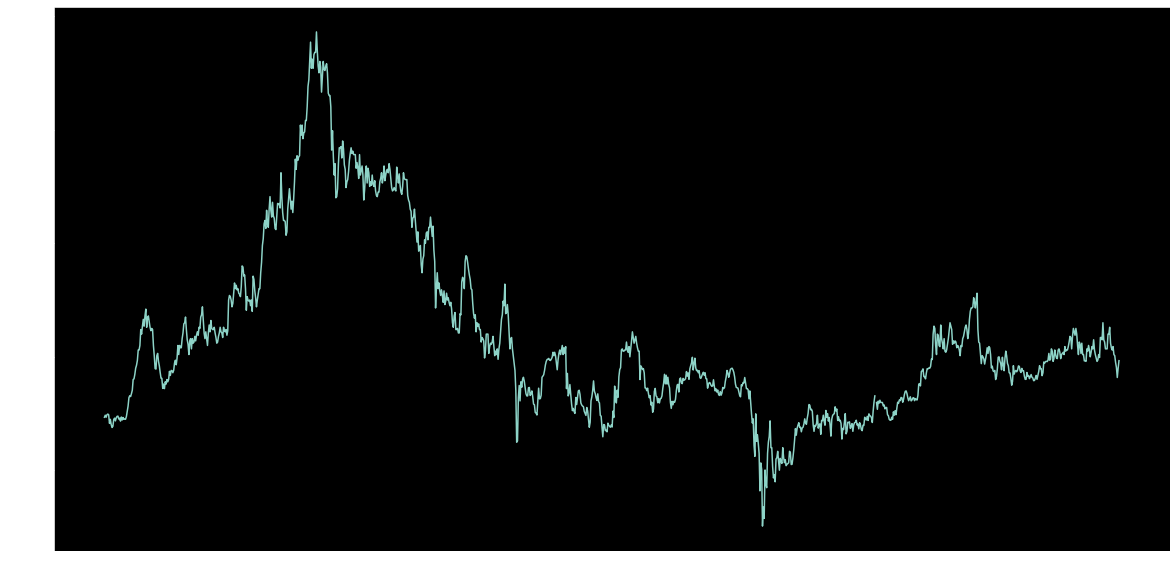

In [26]:
sns.lineplot(data= df1301, x= 'Date', y='Open', sort=False)
plt.xticks([])
plt.show();

In [103]:
df1= pd.DataFrame(df1301['Open'])

In [115]:
dates= np.array(df1301['Date'], dtype= 'datetime64')

In [116]:
dates

array(['2017-01-04', '2017-01-05', '2017-01-06', ..., '2021-12-01',
       '2021-12-02', '2021-12-03'], dtype='datetime64[D]')

In [120]:
ser1301= pd.Series(df1['Open'], index= dates)

In [122]:
ser1301

2017-01-04    2734.0
2017-01-05    2743.0
2017-01-06    2734.0
2017-01-10    2745.0
2017-01-11    2748.0
               ...  
2021-11-29    2975.0
2021-11-30    2953.0
2021-12-01    2909.0
2021-12-02    2949.0
2021-12-03    2983.0
Name: Open, Length: 1202, dtype: float64

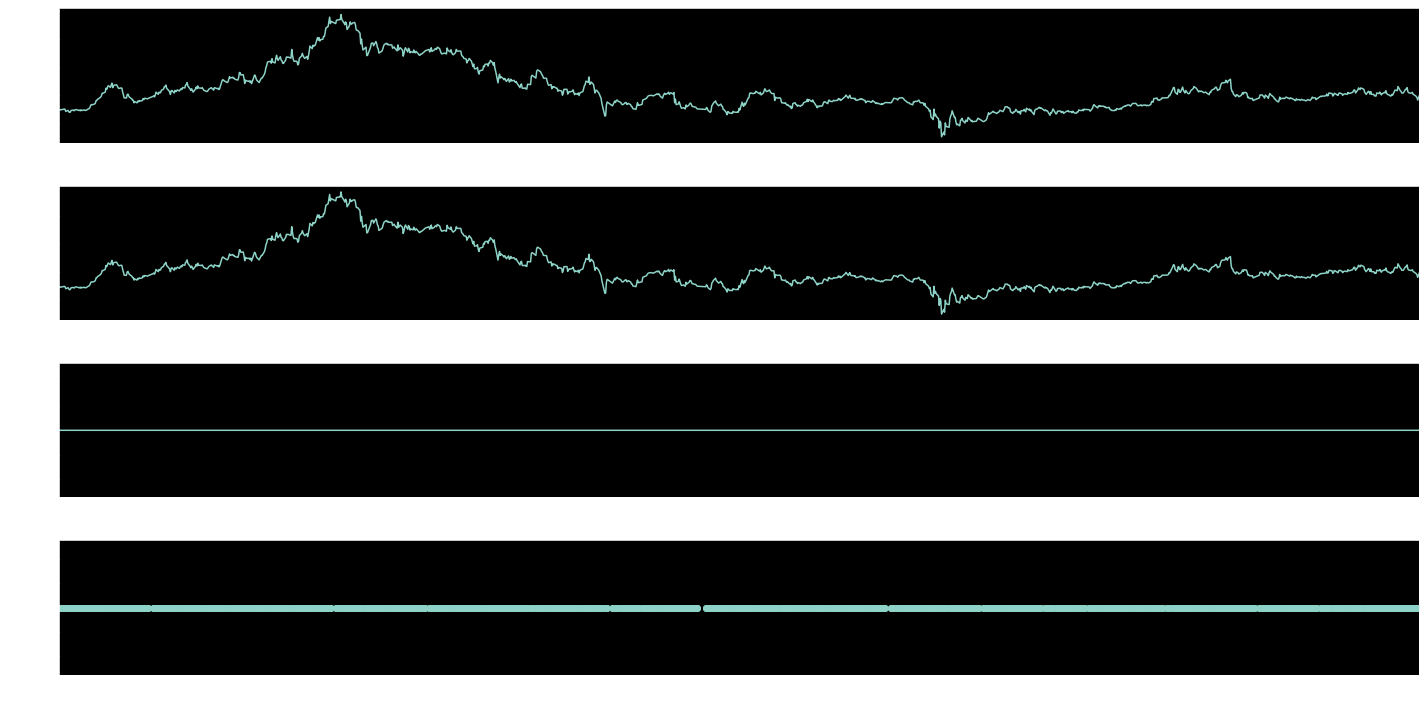

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp= seasonal_decompose(df1, model='additive', period= 1)
decomp.plot();

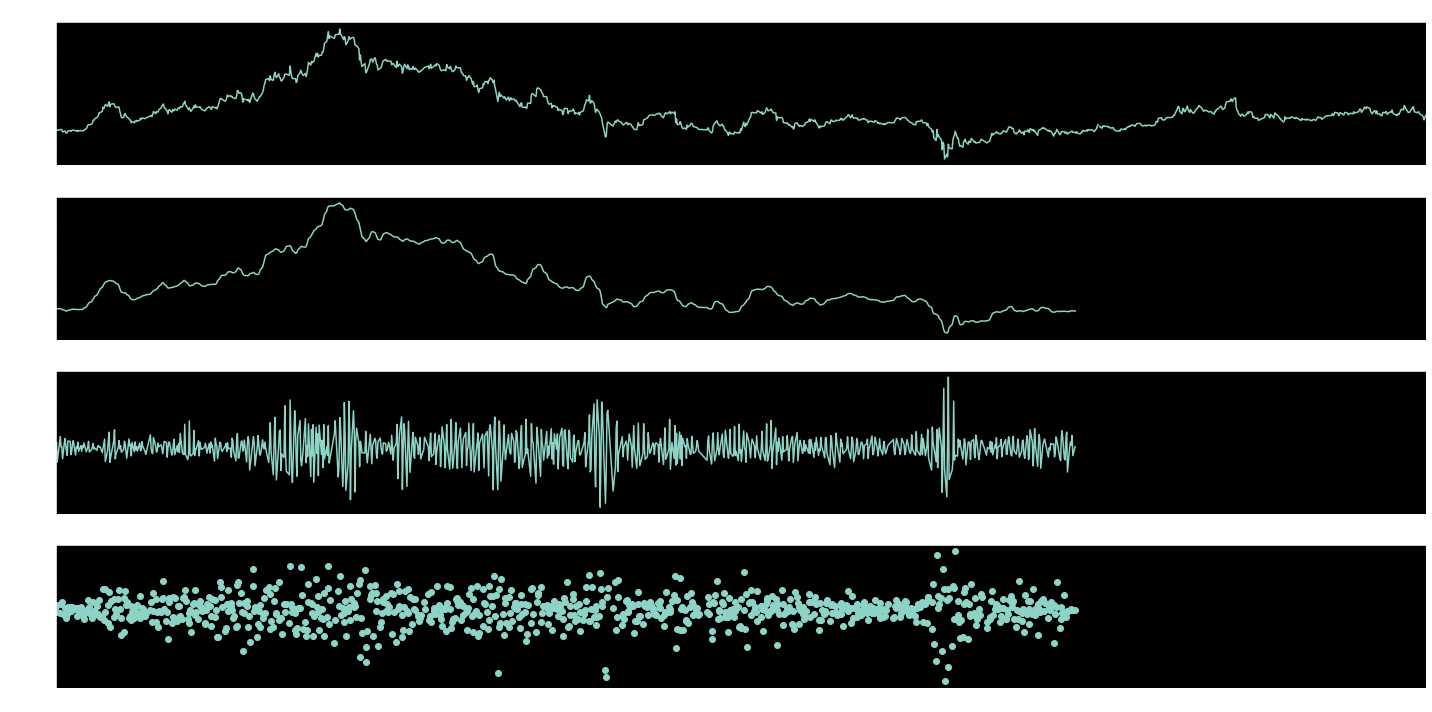

In [130]:
from statsmodels.tsa.seasonal import STL
decom1= STL(ser1301, period= 4, robust=False).fit()
decom1.plot()
plt.show();

In [134]:
dfop= pd.read_csv('./jpx_data/train_files/options.csv',low_memory= False)

In [133]:
dfop

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.47360,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.47360,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.47360,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.47360,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.47360,14.5932,0.0091,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567689,20211203_199244018,2021-12-03,199244018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,335.0,368.5305,24.70275,19.2442,0.1564,0.0,0.0
3567690,20211203_199245018,2021-12-03,199245018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,1160.0,1253.3703,24.70275,19.0517,0.1564,0.0,0.0
3567691,20211203_199246018,2021-12-03,199246018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,1015.0,1097.0436,24.70275,19.0956,0.1564,0.0,0.0
3567692,20211203_199247018,2021-12-03,199247018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,885.0,959.3328,24.70275,19.1168,0.1564,0.0,0.0
